# Python Version of "Particle Filter Explained without Equations"

This is the matlab code behind the movie "Particle Filter Explained without Equations", which can be found at http://youtu.be/aUkBa1zMKv4

Written by Andreas Svensson, October 2013
Updated by Andreas Svensson, February 2013, fixing a coding error in the 'propagation-update' of the weights
Translated to Python by Joshua Saunders, February 2021

andreas.svensson@it.uu.se
http://www.it.uu.se/katalog/andsv164

josh137@gatech.edu

The code is provided as is, and I take no responsibility for what this
code may do to you, your computer or someone else.

This code is licensed under a
Creative Commons Attribution-ShareAlike 3.0 Unported License.
http://creativecommons.org/licenses/by-sa/3.0/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


# Setting the random seed, so the same example can be run several times
np.random.seed(0)

Matplotlib is building the font cache; this may take a moment.


In [2]:
def linspace(start, stop, size):
    return np.linspace(start, stop, int((stop-start)/size))

In [3]:
# Some unceratinty parameters
measurement_noise_stdev = 0.1 
speed_stdev = 1

# Speed of the aircraft
speed = 1

# Set starting position of aircraft
plane_pos_x = -25
plane_pos_y = 4

# Some parameters for plotting the particles
m = 1000
k = 0.0001

# Number of particles
N = 200

# Some variables for plotting
step_size = 0.01
plot_vector_sea = linspace(-10., 10., 0.01)
plot_vector_mountains = np.concatenate((linspace(-40., -10., 0.01), linspace(10., 40., 0.01)))
# plot_vector_mountains = np.concatenate([
#     np.arange(-40., -10.+step_size, step_size), np.arange(10+step_size, 40, step_size)
# ])

plot_height = 5

In [4]:
def plot_plane(position, axis):
    """Plots a figure that resembles a plane
    
    Arguments:
        position: a tuple (or list) that contains the x- and y-coordinates of the plane, respectively
        axis: the axis of the pyplot figure to plot the plane in

    Returns:
        None
    """
    x_pos, y_pos = position
    x = x_pos - 0.6 + np.array([-1.0,  -0.1,  -0.09, 0.3,   0.7,  0.8, 0.7,  0.3, -0.09, -0.1, -1.0])
    y = y_pos +       np.array([-0.05, -0.05, -0.4, -0.05, -0.05, 0.0, 0.05, 0.05, 0.4,   0.05, 0.05])
    return axis.fill(x, y, 'k')


def ground(x):
    """This function describes the ground
    
    (x>=10).*((1-(x-10)/30).*sin(x-10)+((x-10)/30).*sin(1.5*(x-10))+0.2.*(x-10).*(x<=20)+2*(x>20))+...
    (x<=-10).*((1-(-x-10)/30).*sin(-x-10)+((-x-10)/30).*sin(1.5*(-x-10))+0.2.*(-x-10).*(x>=-20)+2*(x<-20))
    """
    # g = np.multiply((x >= 10),(np.multiply((1 - (x - 10) / 30),np.sin(x - 10)) + np.multiply(((x - 10) / 30),np.sin(np.dot(1.5,(x - 10)))) + np.multiply(np.multiply(0.2,(x - 10)),(x <= 20)) + np.dot(2,(x > 20)))) + np.multiply((x <= - 10),(np.multiply((1 - (- x - 10) / 30),np.sin(- x - 10)) + np.multiply(((- x - 10) / 30),np.sin(np.dot(1.5,(- x - 10)))) + np.multiply(np.multiply(0.2,(- x - 10)),(x >= - 20)) + np.dot(2,(x < - 20))))
    g = (x>=10)*((1-(x-10)/30)*np.sin(x-10)+((x-10)/30)*np.sin(1.5*(x-10))+0.2*(x-10)*(x<=20)+2*(x>20))+ \
    (x<=-10)*((1-(-x-10)/30)*np.sin(-x-10)+((-x-10)/30)*np.sin(1.5*(-x-10))+0.2*(-x-10)*(x>=-20)+2*(x<-20))
    return g

([], [])

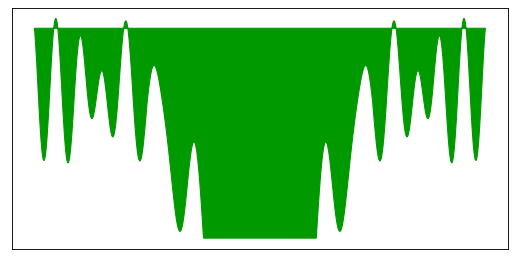

In [6]:
# Plot the environment
fig, ax = plt.subplots(figsize=(8, 4), dpi=80)
ax.fill(plot_vector_mountains, ground(plot_vector_mountains), color=[0, 0.6, 0])


plt.xticks([])
plt.yticks([])